# Sowing Success: Machine Learning Helps Farmers Select the Best Crops

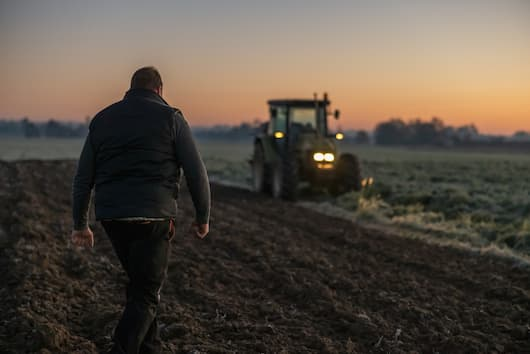)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [ ]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

crops.isna().sum()


N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [ ]:
crops['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [ ]:
X=crops.drop('crop', axis=1).values
y=crops['crop'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define target and features
target = 'crop'
features = crops.drop(columns=target).columns

# Dictionary to store performance of each feature
feature_scores = {}

# Loop through each feature
for feature in features:
    # Define X and y using only this feature
    X = crops[[feature]]
    y = crops[target]

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Store result
    feature_scores[feature] = acc

# Print results
print("\n🔍 Predictive performance by feature:")
for feat, score in feature_scores.items():
    print(f"{feat}: {score:.4f}")



🔍 Predictive performance by feature:
N: 0.1432
P: 0.1886
K: 0.2568
ph: 0.0977


In [ ]:
#  Find the best predictive feature
best_predictive_feature = max(feature_scores, key=feature_scores.get)
best_score = feature_scores[best_predictive_feature]

# Store as a dictionary
best_predictive_feature = {best_predictive_feature: best_score}

# Display the result
print("Best Predictive Feature:", best_predictive_feature)

Best Predictive Feature: {'K': 0.25681818181818183}
